In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px 
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context('paper')

In [2]:
df = pd.read_csv(r'/Users/jack/Desktop/Data Analysis Practice/cinemaTicket_Ref.csv',parse_dates=['date'])

In [3]:
df.set_index('date',inplace=True)

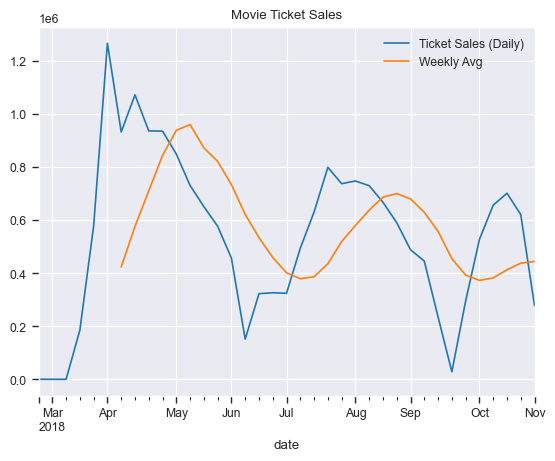

In [4]:
daily_ts = df.resample('w').tickets_sold.sum()

daily_ts.plot(label='Ticket Sales (Daily)')

daily_ts.rolling(window=7).mean().plot(label='Weekly Avg')

plt.title('Movie Ticket Sales')

plt.legend()

plt.show()


In [5]:
print(f'Number of Unique Cinema Locations: {df.cinema_code.nunique()}')

print(f'Number of Unique Films: {df.film_code.nunique()}')

Number of Unique Cinema Locations: 246
Number of Unique Films: 48


In [6]:
cinemas = ['cinema_' + str(x) for x in df.cinema_code.unique()]

In [7]:
df.cinema_code.unique()

array([304, 352, 489, 429, 524,  71, 163, 450,  51, 522,  43, 529,  82,
       344,  73, 485, 518, 448, 431,  72, 144, 456, 238, 312, 168, 254,
       214, 474, 445, 300, 362, 324, 452, 291, 479, 210, 428, 277,  56,
       253, 243,  39, 310, 201, 457, 191, 532, 167, 266, 204, 380, 169,
       162, 506, 537, 513, 467, 509, 165, 262, 486, 198, 508, 222,  98,
       230, 156, 181, 141, 528,  94, 350, 442, 556, 475, 142,  35,  89,
        34, 225, 182, 396,  50,  61, 487,  88, 338, 417, 194,  57, 285,
       187, 159, 184,  81, 207, 339, 326, 531, 505, 492, 299, 507, 316,
       333, 172, 526, 414, 115, 468, 490, 441, 430, 472, 511, 480, 470,
       496, 466, 381, 368, 498, 195, 546, 516, 425, 488, 535, 196, 453,
       321, 152, 390, 166, 247, 454, 464, 499, 460, 251, 481, 315, 307,
       120, 250, 533, 221, 248, 313, 164,  70, 180, 160, 495, 314, 415,
       174, 259, 471, 245,  83,  91, 365, 359, 286,  64, 426, 237, 536,
       397, 476, 503, 491, 517,  55, 170, 175,  62, 539, 541, 54

In [8]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
date,,,,,,,,,,,,,
2018-05-05,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,5,2,5
2018-05-05,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,5,2,5
2018-05-05,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,5,2,5
2018-05-05,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,5,2,5
2018-05-05,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,5,2,5


In [9]:
df = df.assign(num_attendants = df.occu_perc.div(100) * df.capacity, # engineer "number of attendants feature as occupancy percentage * capacity
               over_sold = np.where(df.tickets_out > 0,1,0) #avg tickets price could be indicative of a sale or something similar 
               )

In [10]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,num_attendants,over_sold
date,,,,,,,,,,,,,,,
2018-05-05,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,5,2,5,26.0,0
2018-05-05,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,5,2,5,42.0,0
2018-05-05,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,5,2,5,32.0,0
2018-05-05,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,5,2,5,12.0,0
2018-05-05,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,5,2,5,15.0,0


In [11]:
piv = (df.query('cinema_code < 100')
       
 .groupby('cinema_code').resample('d')
 
 .agg(capacity = ('capacity','sum'),
                                           sold_out = ('over_sold','max'),
                                           
                                          # attendance = ('num_attendants','sum'),
                                           
                                           tickets_sold = ('tickets_sold','sum'),
                                           
                                           ticket_price = ('ticket_price','mean'),
                                           num_films = ('film_code','nunique')).unstack(0))

data = piv.stack()

In [12]:
#aggregate across all theatres and find common trends 

agg = data.groupby('date').sum()

agg.corr() # it looks like the chosen covariates may be predictive. Lets check for seasonality and see if we can smooth the timeseries

,capacity,sold_out,tickets_sold,ticket_price,num_films
capacity,1.000000,0.494162,0.426997,0.606541,0.948041
sold_out,0.494162,1.000000,0.445666,0.204298,0.485936
tickets_sold,0.426997,0.445666,1.000000,-0.074727,0.423037
ticket_price,0.606541,0.204298,-0.074727,1.000000,0.574736
num_films,0.948041,0.485936,0.423037,0.574736,1.000000


In [13]:
from feature_engine.datetime import DatetimeFeatures 

dt_transformer = DatetimeFeatures(variables=['date'],
                                  drop_original=False,
                                  features_to_extract=['day_of_week','weekend','day_of_month'])

agg_dt = dt_transformer.fit_transform(agg.reset_index())

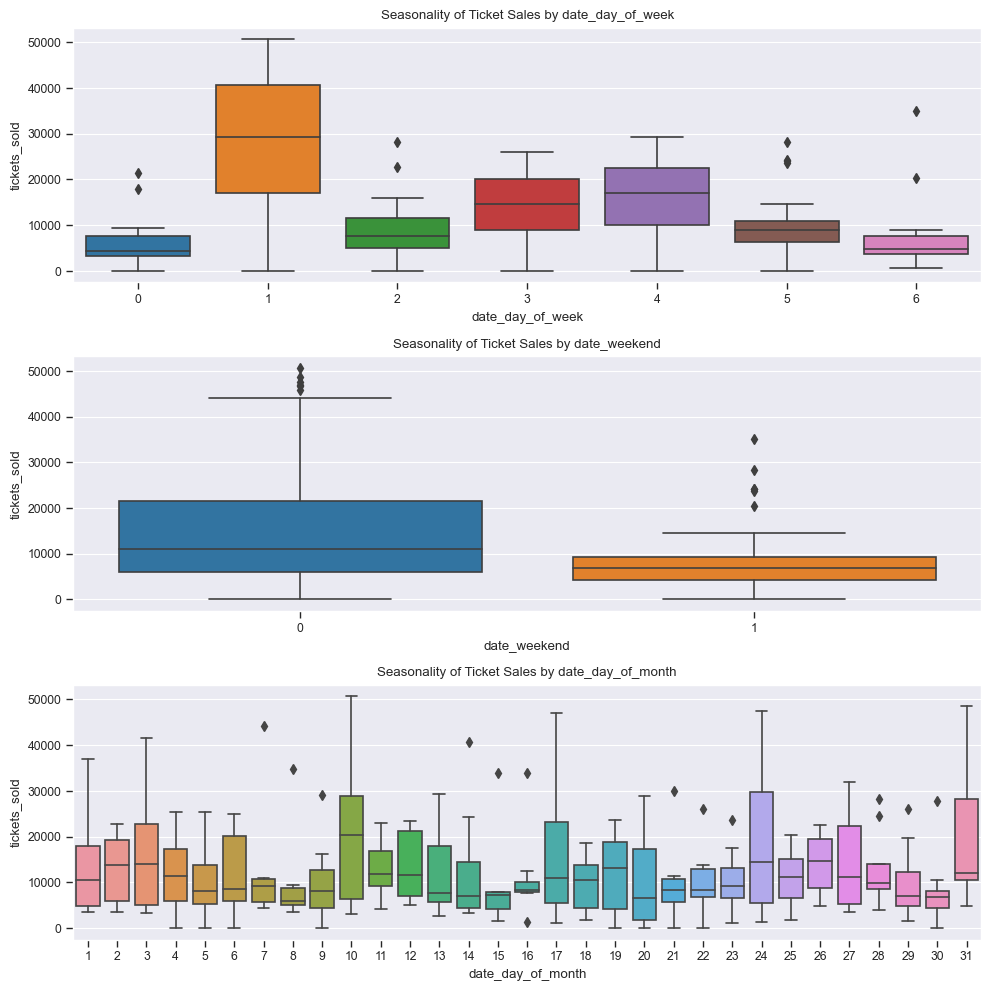

In [14]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(10,10),
                       nrows = 3) 

ax = ax.flatten()

dt_feats = ['date_' + x for x in dt_transformer.features_to_extract_]

for i, feat in enumerate(dt_feats): 
    
    sns.boxplot(agg_dt, 
                x=feat,
                y='tickets_sold',
                ax=ax[i])
    
    ax[i].set_title(f'Seasonality of Ticket Sales by {feat}')
    
fig.tight_layout()

it looks like there is weekend and weekly seasonality, there may also be monthly seasonality. 

/var/folders/k6/3y0j37d96lqf05r_8yyfcqvh0000gn/T/ipykernel_56904/1130652446.py:13: UserWarning:

The figure layout has changed to tight



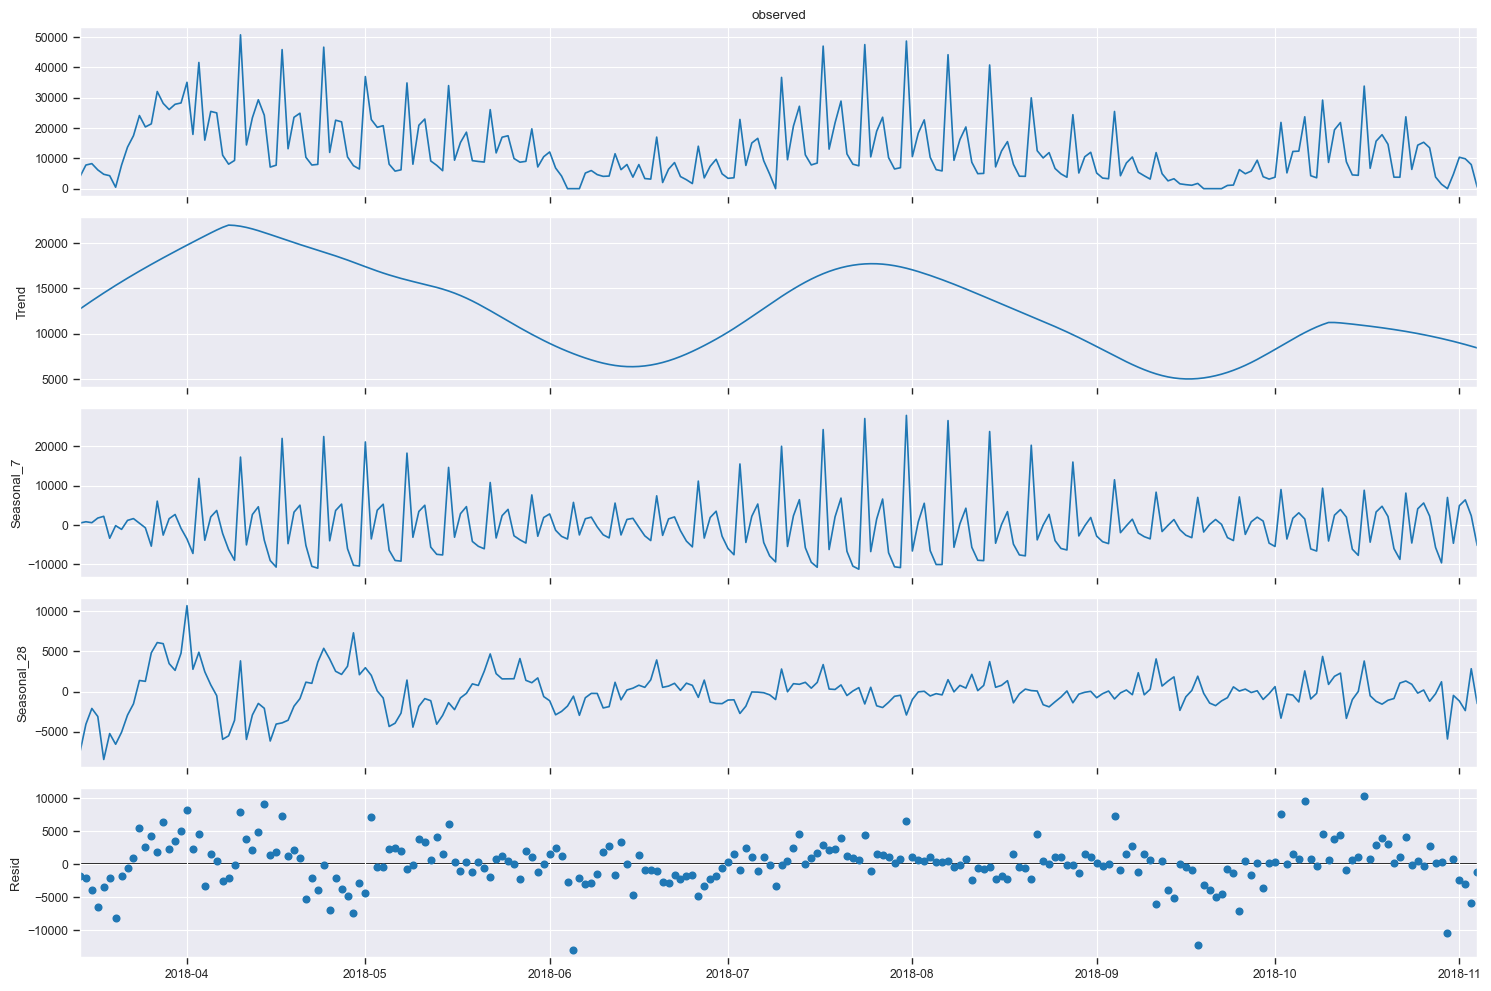

In [15]:
from statsmodels.tsa.seasonal import MSTL

res = MSTL(endog=agg['tickets_sold'],
     periods=[7,
              28,
              ],
     windows=[9,9]).fit()

plt.rc('figure',figsize=(15,10))

res.plot()

plt.tight_layout()

<Axes: ylabel='Frequency'>

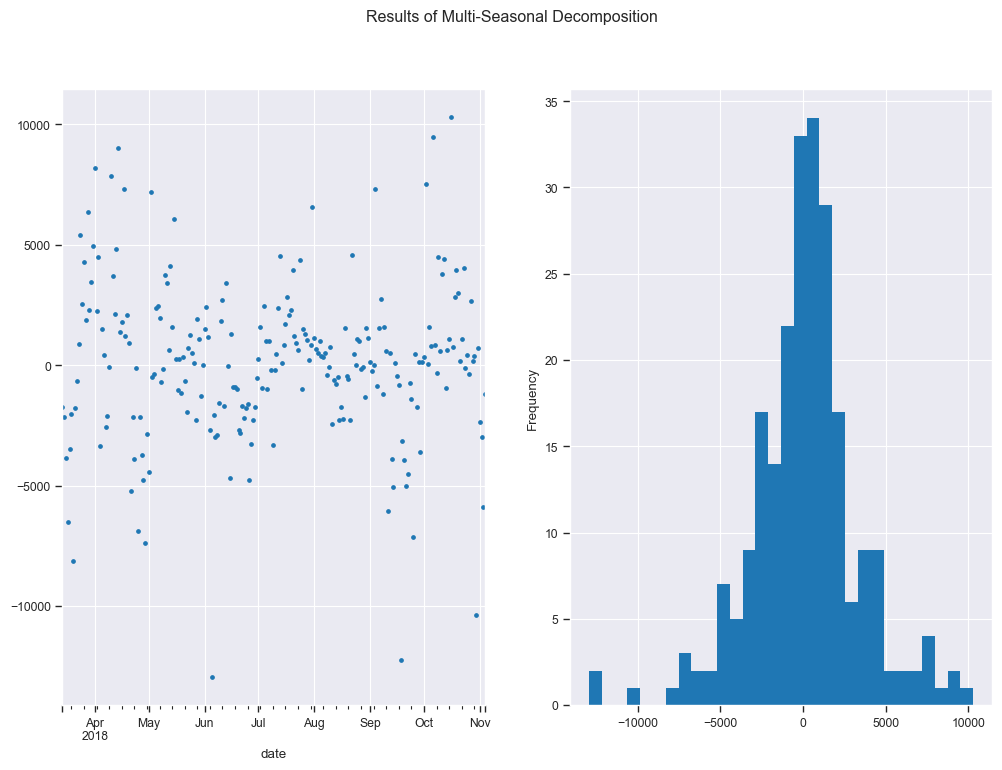

In [16]:
#lets detect outliers using the residuals 
fig, ax = plt.subplots(figsize=(12,8),
                       ncols=2)

fig.suptitle(f'Results of Multi-Seasonal Decomposition')


res.resid.plot(kind='line',
               linestyle=' ',
               marker='.',
               ax=ax[0])

res.resid.plot(kind='hist',bins=30,ax=ax[1])

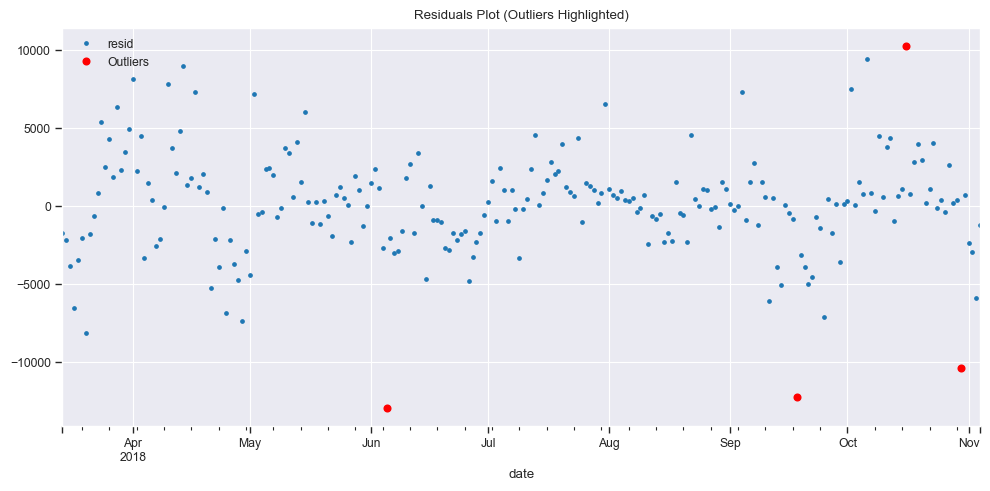

In [17]:
#the residuals are normally distributed so we can utilize z scores to impute them.. 

from scipy.stats import zscore 

resid_z = zscore(res.resid)

mask = (resid_z.abs() > 3)


ax = res.resid.plot(kind='line',
               linestyle=' ',
               marker='.',
               figsize=(10,5),
               title='Residuals Plot (Outliers Highlighted)')

outliers = res.resid.loc[mask]


outliers.plot(marker='o',
                       color='red',
                       linestyle=' ',
                       label='Outliers',
                       ax=ax)

ax.legend()

plt.tight_layout()

In [18]:
data = piv.unstack(1)

data['tickets_sold'].unstack(0).loc[outliers.index,:] = np.nan

data = data.ffill().dropna()

In [19]:
data_multi = data['tickets_sold']

In [20]:
from lightgbm import LGBMRegressor 
from sklearn.preprocessing import MinMaxScaler
from feature_engine.datetime import DatetimeFeatures
from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate

In [21]:
#BUILD EXOG VARIABLE DFS and forecast ahead by 60 days 

steps = 21

dt_index = data.reset_index()['date'].unique()

exog = pd.DataFrame(dt_index,
                    index=dt_index,
                    columns=['date']).asfreq('d') 
fut_index = pd.date_range(start = dt_index.max() + pd.DateOffset(days=1),
                          periods=60,
                          freq='d')

fut_exog = pd.DataFrame(fut_index,
                        index=fut_index,
                        columns=['date'])

#print both for sanity check 

exog['date'].tail(), fut_exog['date'].head() # looks good 

(2018-10-31   2018-10-31
 2018-11-01   2018-11-01
 2018-11-02   2018-11-02
 2018-11-03   2018-11-03
 2018-11-04   2018-11-04
 Freq: D, Name: date, dtype: datetime64[ns],
 2018-11-05   2018-11-05
 2018-11-06   2018-11-06
 2018-11-07   2018-11-07
 2018-11-08   2018-11-08
 2018-11-09   2018-11-09
 Freq: D, Name: date, dtype: datetime64[ns])

In [22]:
#DEFINE NEW DT TRANSFORMER FOR EXOG AND MAKE EXOG PIPELINE 

from sklearn.pipeline import make_pipeline
from sklearn import set_config 

set_config(transform_output='pandas')

dt_transformer = DatetimeFeatures(variables=['date'],
                                  features_to_extract=['day_of_week','weekend','day_of_month'])

exog_pipe = make_pipeline(dt_transformer,MinMaxScaler())

exog_pipe.fit_transform(exog)

,date_day_of_week,date_weekend,date_day_of_month
2018-03-14,0.333333,0.0,0.433333
2018-03-15,0.500000,0.0,0.466667
2018-03-16,0.666667,0.0,0.500000
2018-03-17,0.833333,1.0,0.533333
2018-03-18,1.000000,1.0,0.566667
...,...,...,...
2018-10-31,0.333333,0.0,1.000000
2018-11-01,0.500000,0.0,0.000000
2018-11-02,0.666667,0.0,0.033333
2018-11-03,0.833333,1.0,0.066667


# Backtesting our multivariate cinema forecasting model

from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate
#set up backtesting parameters 

steps = 7

initial_train_size = 180 #6 months of training data 

#store metrics and predictions 
model_metrics = list() 

backtested_predictions = list() 

for cinema in data_multi.columns:
    
    forecaster = ForecasterAutoregMultiVariate(
        regressor=LGBMRegressor(linear_tree=True,
                                verbosity = -1,
                                linear_lambda = .1,
                                learning_rate = .2),
        steps=steps,
        lags=7,
        level=cinema,
        transformer_series=MinMaxScaler(),
        transformer_exog=exog_pipe)
    
    #fit forecaster 
    forecaster.fit(series=data_multi,
                   exog=exog)
    
    #backtest fitted forecaster using each of the 20 movie theaters as target 
    lgbm_metric, lgbm_prediction = backtesting_forecaster_multivariate(
            forecaster = forecaster, 
            series = data_multi,
            exog = exog,
            initial_train_size = initial_train_size,
            steps=steps,
            metric = ['mean_absolute_error','mean_squared_error'],
            fixed_train_size=True,
            verbose=True,
            show_progress=True,
            refit = 2, # refit every other week
            allow_incomplete_fold=True,
            suppress_warnings=True
            )
    
    model_metrics.append(lgbm_metric)
    
    backtested_predictions.append(lgbm_prediction)

prediction_df = pd.concat(backtested_predictions,axis=1).round()

metrics_df = pd.concat(model_metrics).round() 

metrics_df = (metrics_df
 .assign(rmse = np.sqrt(metrics_df['mean_squared_error'])))

#plot random sample of our series 
num_ts = 3

data_subset = data_multi.sample(n=3,axis=1)

fig, axes = plt.subplots(nrows=num_ts,
                       figsize=(10,3 * num_ts))

#generate plots 
for idx in range(num_ts): 
    
    cinema = data_subset.columns[idx] # slice column 
    ax = axes[idx] # grab axes index 
    
    data_subset.iloc[-60:][cinema].plot(ax=ax,label='actual')
    prediction_df.loc[:,cinema].plot(ax=ax,
                                  label='backtested_in-sample',
                                  linestyle='--',
                                  color='r')
    #Pull Model's mean absolute error 
    model_mae = metrics_df[metrics_df.levels == cinema]['mean_absolute_error'].values
    ax.legend(bbox_to_anchor=(1,1))
    ax.set_title(f'Forecast for {cinema}')
    #add error to plot 
    ax.text(transform=ax.transAxes,
            x=.1,
            y=.7,
            s=f"Model's Backtested MAE: {model_mae}",
            bbox=dict(facecolor='white', 
                      edgecolor='black', boxstyle='round,pad=0.5'),
           fontweight='bold',fontsize=10)
    
fig.tight_layout()

# Transforming the data to forecast

In [23]:
data = data.unstack([0]).swaplevel(0,1).reset_index(1)

In [24]:
# this is our multivariate forecasting dataframe that includes covariates

data['cinema_code'] = 'cinema_' + data['cinema_code'].astype(str) 

# adding "cinema_" to the cinema code for forecaster object

data['cinema_code'].unique()

array(['cinema_32', 'cinema_33', 'cinema_34', 'cinema_35', 'cinema_39',
       'cinema_43', 'cinema_48', 'cinema_50', 'cinema_51', 'cinema_52',
       'cinema_55', 'cinema_56', 'cinema_57', 'cinema_61', 'cinema_62',
       'cinema_64', 'cinema_70', 'cinema_71', 'cinema_72', 'cinema_73',
       'cinema_81', 'cinema_82', 'cinema_83', 'cinema_88', 'cinema_89',
       'cinema_91', 'cinema_94', 'cinema_98'], dtype=object)

In [25]:
data_multi = data_multi.unstack(0)

data_multi.columns = ['cinema_' + str(x) for x in data_multi.columns]

In [26]:
cinemas_to_fcst = data_multi.columns # these are the cinemas we will forecast! 

cinemas_to_fcst

Index(['cinema_32', 'cinema_33', 'cinema_34', 'cinema_35', 'cinema_39',
       'cinema_43', 'cinema_48', 'cinema_50', 'cinema_51', 'cinema_52',
       'cinema_55', 'cinema_56', 'cinema_57', 'cinema_61', 'cinema_62',
       'cinema_64', 'cinema_70', 'cinema_71', 'cinema_72', 'cinema_73',
       'cinema_81', 'cinema_82', 'cinema_83', 'cinema_88', 'cinema_89',
       'cinema_91', 'cinema_94', 'cinema_98'],
      dtype='object')

In [27]:
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate

#set up backtesting parameters 

steps = 7

initial_train_size = 180 #6 months of training data 

#store metrics and predictions 
model_metrics = list() 

backtested_predictions = list() 

for cinema in cinemas_to_fcst:
    
    cinema_ts = (data[data.cinema_code == cinema]
        .drop(columns = ['cinema_code'])
        .asfreq('d')
        .rename(columns = {'tickets_sold':f'{cinema}'})) # slice a single cinema per dataframe
    
    #build forecaster object 
    forecaster = ForecasterAutoregMultiVariate(
        regressor=LGBMRegressor(linear_tree=True,
                                verbosity = -1,
                                linear_lambda = 1,
                                learning_rate = .2),
        steps=steps, #predict n steps ahead (only 7 steps as we're backtesting this)
        lags=[1,2,3,7,28], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
        level=f'{cinema}',
        transformer_series=MinMaxScaler(),
        transformer_exog=exog_pipe)
    
    #fit forecaster 
    forecaster.fit(series=cinema_ts,
                   exog=exog)
    
    #backtest fitted forecaster using each of the 20 movie theaters as target 
    lgbm_metric, lgbm_prediction = backtesting_forecaster_multivariate(
            forecaster = forecaster, 
            series = cinema_ts,
            exog = exog,
            initial_train_size = initial_train_size,
            steps=steps,
            metric = ['mean_absolute_error','mean_squared_error'],
            fixed_train_size=False, # expanding window for backtesting training, why? We don't have much data
            verbose=True,
            show_progress=True,
            refit = True, # refit every other week
            allow_incomplete_fold=True,
            suppress_warnings=True
            )
    
    model_metrics.append(lgbm_metric)
    
    backtested_predictions.append(lgbm_prediction)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

In [28]:
prediction_df = pd.concat(backtested_predictions,axis=1)

metrics_df = pd.concat(model_metrics)

metrics_df['rmse'] = np.sqrt(metrics_df['mean_squared_error'])

/var/folders/k6/3y0j37d96lqf05r_8yyfcqvh0000gn/T/ipykernel_56904/1354213156.py:32: UserWarning:

The figure layout has changed to tight

/var/folders/k6/3y0j37d96lqf05r_8yyfcqvh0000gn/T/ipykernel_56904/1354213156.py:32: UserWarning:

The figure layout has changed to tight



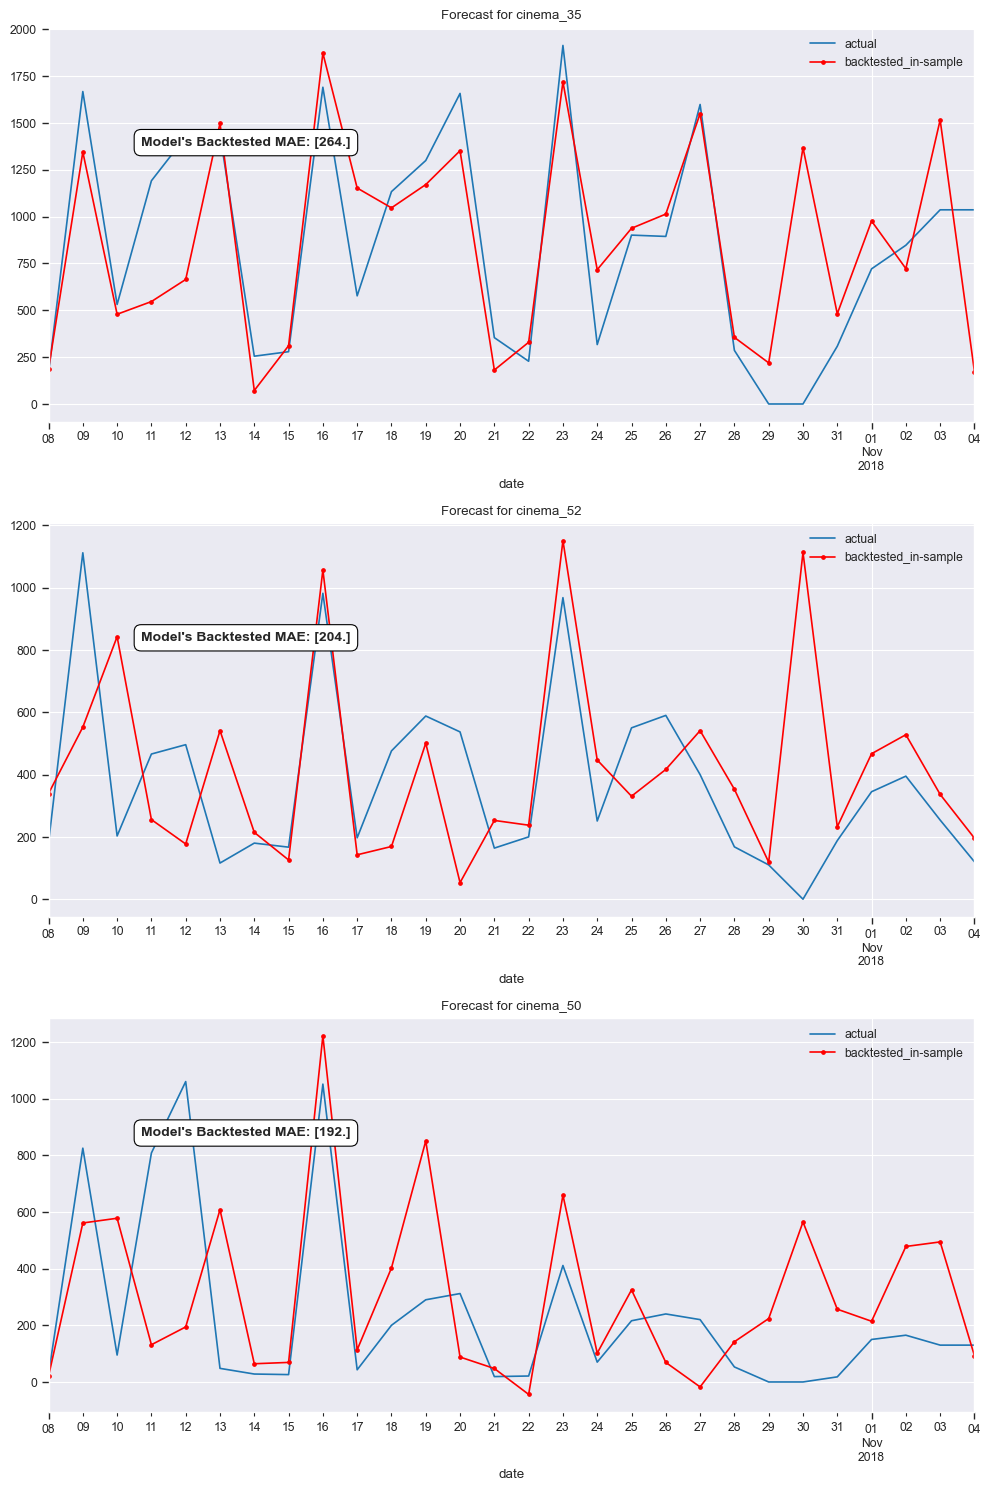

In [29]:
#plot random sample of our series 
num_ts = 3

data_subset = data_multi.sample(n=3,axis=1)

fig, axes = plt.subplots(nrows=num_ts,
                       figsize=(10,3 * 5))

#generate plots 
for idx in range(num_ts): 
    
    cinema = data_subset.columns[idx] # slice column 
    ax = axes[idx] # grab axes index 
    
    data_subset.iloc[-28:][cinema].plot(ax=ax,label='actual')
    prediction_df.loc[:,cinema].tail(28).plot(ax=ax,
                                  label='backtested_in-sample',
                                  marker='.',
                                  color='r')
    #Pull Model's mean absolute error 
    model_mae = metrics_df[metrics_df.levels == cinema]['mean_absolute_error'].values.round()
    ax.legend(bbox_to_anchor=(1,1))
    ax.set_title(f'Forecast for {cinema}')
    #add error to plot 
    ax.text(transform=ax.transAxes,
            x=.1,
            y=.7,
            s=f"Model's Backtested MAE: {model_mae}",
            bbox=dict(facecolor='white', 
                      edgecolor='black', boxstyle='round,pad=0.5'),
           fontweight='bold',fontsize=10)
    fig.tight_layout()

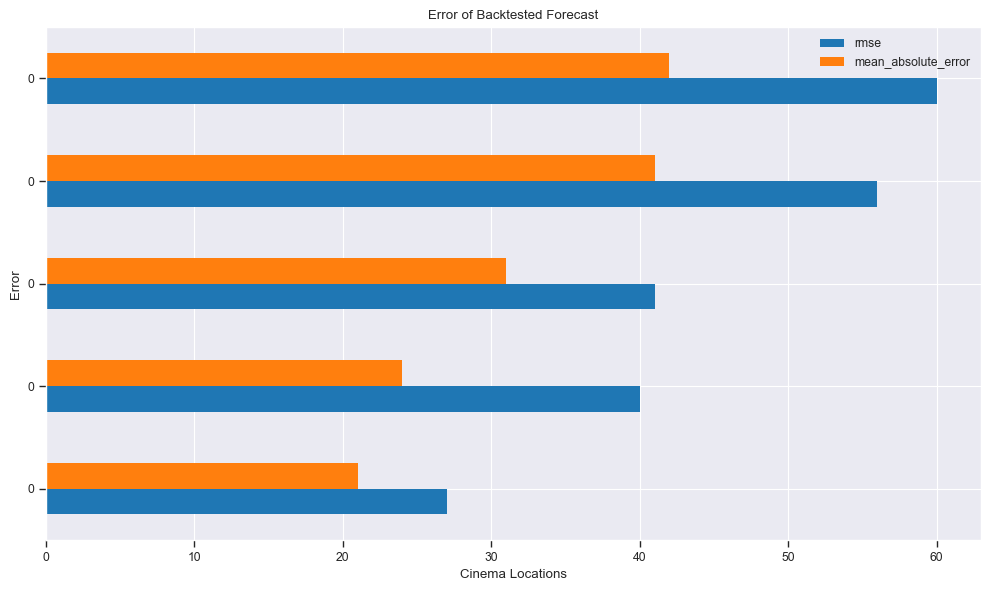

In [30]:
metrics_df = (metrics_df.round()
              #.set_index('levels')
              .sort_values(by='rmse', ascending=True))

#plot top 15 features 
metrics_df.nsmallest(n=5,
                     columns=['rmse']).plot(
    kind='barh',
    xlabel='Cinema Locations',
    ylabel='Error',
    title='Error of Backtested Forecast',
    y=['rmse','mean_absolute_error'],
    figsize=(10,6)
)
                    
                    
plt.tight_layout()

# Forecast Using Backtested Models: Probabalistic Monthly Forecast

In [31]:
oos_predictions = []

for cinema in cinemas_to_fcst:
    
    cinema_ts = (data[data.cinema_code == cinema]
        .drop(columns = ['cinema_code'])
        .asfreq('d')
        .rename(columns = {'tickets_sold':f'{cinema}'})) # slice a single cinema per dataframe
    
    #build forecaster object 
    forecaster = ForecasterAutoregMultiVariate(
        regressor=LGBMRegressor(linear_tree=True,
                                verbosity = -1,
                                linear_lambda = 1,
                                learning_rate = .2),
        steps=21, #predict n steps ahead (only 7 steps as we're backtesting this)
        lags=[1,2,3,7,28], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
        level=f'{cinema}',
        transformer_series=MinMaxScaler(),
        transformer_exog=exog_pipe)
    
    #fit forecaster 
    forecaster.fit(series=cinema_ts,
                   exog=exog)
    
    out_of_sample_predictions = forecaster.predict_interval(steps=21,
                   exog=fut_exog)
    
    #append OOS predictions 
    oos_predictions.append(out_of_sample_predictions)

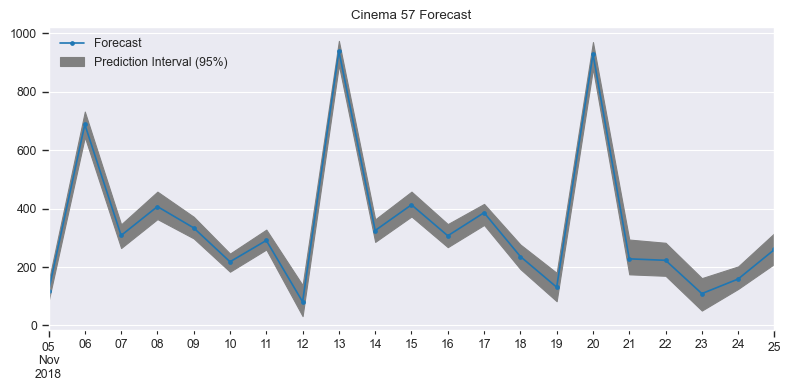

In [32]:
cin_57_fcst = pd.concat(oos_predictions,axis=1).round().filter(like='cinema_57')

ax = cin_57_fcst.plot(y='cinema_57',
                 marker='.',
                 label='Forecast',
                 title='Cinema 57 Forecast',
                 figsize=(8,4))

ax.fill_between(x = cin_57_fcst.index,
                y1=cin_57_fcst['cinema_57_lower_bound'],
                y2 = cin_57_fcst['cinema_57_upper_bound'],
                color='grey',
                label='Prediction Interval (95%)')

ax.legend()

plt.tight_layout()

In [33]:
actuals = data_multi[['cinema_32']]

preds = prediction_df[['cinema_32']]

tmp = actuals.join(preds,rsuffix='_preds',how='inner')

tmp = tmp.assign(residuals = tmp['cinema_32'] - tmp['cinema_32_preds'])

In [34]:
#plot residuals 

#by day of week
fig = px.box(tmp,x=tmp.index.dayofweek,
             y='residuals',
             height=300,
             width=600,
             title='Distribution of Residuals by Day of Week')

fig.update_layout(margin = dict(l=20,r=20,t=35,b=20))

fig.show()

In [35]:
fig = go.Figure() 

trace1 = go.Scatter(x=data_multi.index,
                    y=data_multi['cinema_32'],
                    name='Historical Sales',
                    mode='lines')

#plot insample 
trace2 = go.Scatter(x=prediction_df.index,
                    y=prediction_df['cinema_32'],
                    name='Backtested Predictions',
                    mode='lines')


fig.add_trace(trace1)
fig.add_trace(trace2)


fig.update_layout(
    title='Historical Demand Theatre 32',
    xaxis_title='Date',
    yaxis_title='Demand',
    width=800,
    height=400,
    margin = dict(l=20,r=20,t=35,b=20),
    legend = dict(
        orientation='h',
        yanchor='top',
        y=1.1,
        xanchor='left',
        x=0.001
    )
)

fig.show()

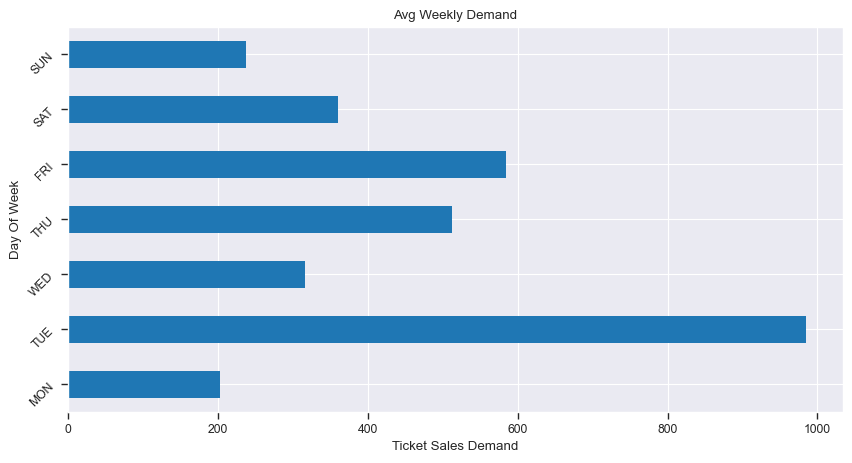

In [36]:
avg_weekly_demand = data_multi.mean(axis=1)\
    .groupby(data_multi.index.dayofweek)\
    .mean()
    

ax = avg_weekly_demand.plot(kind='barh',
                       title='Avg Weekly Demand',
                       xlabel='Ticket Sales Demand',
                       ylabel='Day Of Week',
                       figsize=(10,5))

weekdays = ['MON','TUE','WED','THU','FRI','SAT','SUN']

# Set tick labels for the y-axis
ax.set_yticklabels(labels = weekdays,
                   rotation=45)

plt.show()

# Tuesdays are killing it on average, why? 

<Axes: title={'center': '1 step ahead importances'}, ylabel='feature'>

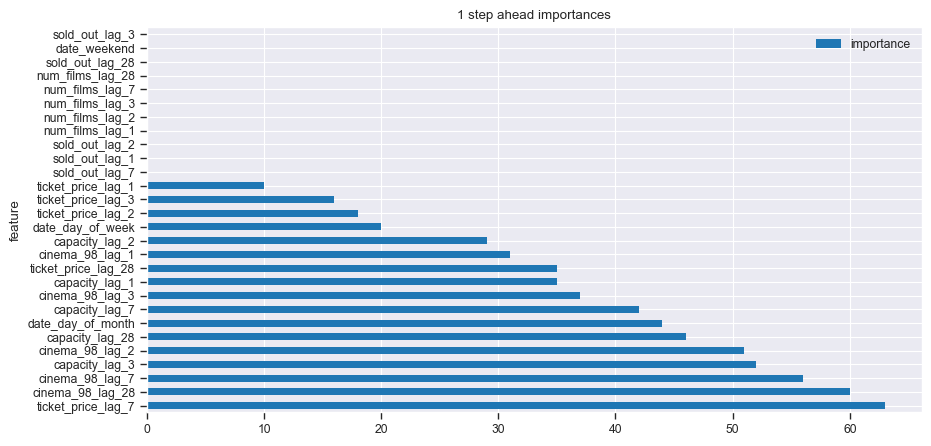

In [37]:
(forecaster
 .get_feature_importances(step=1)
 .set_index('feature').plot(title='1 step ahead importances',
                                                figsize=(10,5),
                                                kind='barh'))

In [38]:
tuesdays = data[data.index.dayofweek == 1]

# lets see if tuesdays have special discounts 
fig = px.box(data,
             y='ticket_price',
             color=data.index.day_name(),
             hover_data = ['cinema_code',data.index.month,'num_films'])

fig.update_layout(title='Distribution of Ticket Price by Day of Week',
             xaxis_title = 'Day of Week',
             yaxis_title='Ticket Price')

fig.show()

In [39]:
# what does the data look like when the number of films is 0? 

data = data.assign(cinema_closed = np.where(data.num_films == 0, 1,0))

In [40]:
cinema_32 = data.query('cinema_code == "cinema_32"')\
    .drop(columns=['cinema_code'])\
        .rename(columns={'tickets_sold':'cinema_32'}).asfreq('d')

In [41]:
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate

#set up backtesting parameters 

steps = 7

initial_train_size = 180 #6 months of training data 

#build forecaster object 
forecaster = ForecasterAutoregMultiVariate(
regressor=LGBMRegressor(linear_tree=True,
                verbosity = -1,
                linear_lambda = 1,
                learning_rate=.2),
steps=steps, #predict n steps ahead (only 7 steps as we're backtesting this)
lags=[1,2,7,14,21,28], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
level=f'cinema_32',
transformer_series=MinMaxScaler(),
transformer_exog=exog_pipe)


#fit forecaster 
forecaster.fit(series=cinema_32,
    exog=exog)

#backtest fitted forecaster using each of the 20 movie theaters as target 
lgbm_metric, lgbm_prediction = backtesting_forecaster_multivariate(
forecaster = forecaster, 
series = cinema_32,
exog = exog,
initial_train_size = initial_train_size,
steps=steps,
metric = ['mean_absolute_error','mean_squared_error'],
fixed_train_size=False, # expanding window for backtesting training, why? We don't have much data
verbose=True,
show_progress=True,
refit = True, # refit every other week
allow_incomplete_fold=True,
suppress_warnings=True
)

model_metrics.append(lgbm_metric)

backtested_predictions.append(lgbm_prediction)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

In [42]:
frame = pd.concat([cinema_32['cinema_32'], 
           lgbm_prediction['cinema_32']\
               .to_frame('preds')],axis=1,join='inner')

residuals = frame['cinema_32'] - frame['preds']

In [43]:
fig = px.box(residuals,color=residuals.index.day_name())

fig.update_layout(title='Residuals by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Demand',
       width=800,
    height=400,
    margin = dict(l=20,r=20,t=35,b=20),
    legend = dict(
        orientation='v',
        y=1.1,
        xanchor='left',
        x=0.001
))

fig.show()

Add fourier features and polynomial interaction features

In [44]:
from feature_engine.creation import CyclicalFeatures
from sklearn.preprocessing import PolynomialFeatures

exog_pipe = make_pipeline(dt_transformer,
                          #transform datetime variables (besides if it is a weekend) to fourier features
                          CyclicalFeatures(variables=['date_day_of_week',
                                                         'date_day_of_month'],
                                              drop_original=True),
                          #add polynomial interaction term for date columns
                          PolynomialFeatures(degree=2,
                                             include_bias=False,
                                             interaction_only=True),
                          #scale data
                          MinMaxScaler())

# Evaluating a few different models 

* random forest 
* lightgbm 
* xgboost

In [45]:
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate

#set up backtesting parameters 

steps = 7

initial_train_size = 180 #6 months of training data 

#build forecaster object 
lgbm_forecaster = ForecasterAutoregMultiVariate(
regressor=LGBMRegressor(linear_tree=True,
                verbosity = -1,
                linear_lambda = .8,
                learning_rate=.2),
steps=steps, #predict n steps ahead (only 7 steps as we're backtesting this)
lags=[1,2,3,7], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
level=f'cinema_32',
transformer_series=MinMaxScaler(),
transformer_exog=exog_pipe)


#fit forecaster 
lgbm_forecaster.fit(series=cinema_32,
    exog=exog)

#backtest fitted forecaster using each of the 20 movie theaters as target 
lgbm_metric, lgbm_prediction = backtesting_forecaster_multivariate(
forecaster = lgbm_forecaster, 
series = cinema_32,
exog = exog,
initial_train_size = initial_train_size,
steps=steps,
metric = ['mean_absolute_error','mean_squared_error'],
fixed_train_size=False, # expanding window for backtesting training, why? We don't have much data
verbose=True,
show_progress=True,
refit = True, # refit every other week
allow_incomplete_fold=True,
suppress_warnings=True
)

model_metrics.append(lgbm_metric)

backtested_predictions.append(lgbm_prediction)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

In [46]:
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate
from sklearn.ensemble import RandomForestRegressor
#set up backtesting parameters 

steps = 7

initial_train_size = 180 #6 months of training data 

#build forecaster object 
rf_forecaster = ForecasterAutoregMultiVariate(
regressor=RandomForestRegressor(random_state=42),
steps=steps, #predict n steps ahead (only 7 steps as we're backtesting this)
lags=[1,2,3,7], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
level=f'cinema_32',
transformer_series=MinMaxScaler(),
transformer_exog=exog_pipe)


#fit forecaster 
rf_forecaster.fit(series=cinema_32,
    exog=exog)

#backtest fitted forecaster using each of the 20 movie theaters as target 
rf_metric, rf_prediction = backtesting_forecaster_multivariate(
forecaster = rf_forecaster, 
series = cinema_32,
exog = exog,
initial_train_size = initial_train_size,
steps=steps,
metric = ['mean_absolute_error','mean_squared_error'],
fixed_train_size=False, # expanding window for backtesting training, why? We don't have much data
verbose=True,
show_progress=True,
refit = True, # refit every other week
allow_incomplete_fold=True,
suppress_warnings=True
)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

In [47]:
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate,bayesian_search_forecaster_multivariate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#set up backtesting parameters 

steps = 7

initial_train_size = 180 #6 months of training data 

#build forecaster object 
xgb_forecaster = ForecasterAutoregMultiVariate(
regressor=XGBRegressor(max_depth=10),
steps=steps, #predict n steps ahead (only 7 steps as we're backtesting this)
lags=[1,2,3,7], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
level=f'cinema_32',
transformer_series=MinMaxScaler(),
transformer_exog=exog_pipe)


#fit forecaster 
xgb_forecaster.fit(series=cinema_32,
    exog=exog)

#backtest fitted forecaster using each of the 20 movie theaters as target 
xgb_metric, xgb_prediction = backtesting_forecaster_multivariate(
forecaster = xgb_forecaster, 
series = cinema_32,
exog = exog,
initial_train_size = initial_train_size,
steps=steps,
metric = ['mean_absolute_error','mean_squared_error'],
fixed_train_size=False, # expanding window for backtesting training, why? We don't have much data
verbose=True,
show_progress=True,
refit = True, # refit every step
allow_incomplete_fold=True,
suppress_warnings=True
)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 180
Number of observations used for backtesting: 56
    Number of folds: 8
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-09-09 00:00:00  (n=180)
    Validation: 2018-09-10 00:00:00 -- 2018-09-16 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-09-16 00:00:00  (n=187)
    Validation: 2018-09-17 00:00:00 -- 2018-09-23 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-09-23 00:00:00  (n=194)
    Validation: 2018-09-24 00:00:00 -- 2018-09-30 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-09-30 00:00:00  (n=201)
    Validation: 2018-10-01 00:00:00 -- 2018-10-07 00:00:00  (n=7)
Fold: 4
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/skforecast/model_selection_multiseries/model_selection_multiseries.py:481: LongTrainingWarning:

The forecaster will be fit 56 times (8 folds * 7 regressors). This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



  0%|          | 0/8 [00:00<?, ?it/s]

In [48]:
metrics = pd.concat([lgbm_metric,rf_metric,xgb_metric]).set_index('levels')

metrics.index = ['LightGBM','RandomForest','XGBoost']

In [49]:
metrics.round() # it looks like LightGBM is the best, lets tune it in attempt to lower our score 

,mean_absolute_error,mean_squared_error
LightGBM,208.0,96887.0
RandomForest,227.0,124891.0
XGBoost,216.0,116067.0


In [50]:
#DEFINE LGBM PARAMETERS 

valid = cinema_32.iloc[:-28] # leave out last month of data for test set

#forecast horizon of 1 week 
forecast_horizon = 7

#initial train size of first 6 months 

initial_train_size = 180

# Regressor hyperparameters search space
def search_space(trial):
    search_space  = {
        'n_estimators'    : trial.suggest_int('n_estimators', 400, 1200, step=100),
        'max_depth'       : trial.suggest_int('max_depth', 3, 10, step=1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 25, 500),
        'learning_rate'   : trial.suggest_float('learning_rate', 0.01, 0.5),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1, step=0.1),
        'max_bin'         : trial.suggest_int('max_bin', 50, 250, step=25),
        'reg_alpha'       : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'      : trial.suggest_float('reg_lambda', 0, 1, step=0.1)
    } 
    return search_space


results_search, frozen_trial = bayesian_search_forecaster_multivariate(
    forecaster = lgbm_forecaster,
    search_space=search_space,
    series = valid,
    steps = forecast_horizon,
    metric = 'mean_absolute_error',
    initial_train_size=initial_train_size,
    fixed_train_size=False,
    n_trials=20,
    return_best=True,
    n_jobs=-1,
    verbose=False,
    show_progress=True
)

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 600, 'max_depth': 9, 'min_data_in_leaf': 27, 'learning_rate': 0.07769376480732886, 'feature_fraction': 0.7, 'max_bin': 50, 'reg_alpha': 0.2, 'reg_lambda': 0.0}
  Backtesting metric: 146.53555134443258
  Levels: ['cinema_32']



wow, it looks like tuning reduced our error by about 30%, lets tune all models and replot our results! 

# Here we perform a bayesian search for the optimal parameters: 

* steps is our forecast horizon, we predict 7 days ahead 
* initial training window of 6 months 
* validation leaves out a month of data to evaluate the model on a true test set. 
* Model does not refit


In [51]:
from skforecast.model_selection_multiseries import backtesting_forecaster_multivariate

#set up backtesting parameters 

steps = 21

initial_train_size = 180 #6 months of training data 

#store metrics and predictions 
tuned_models = {}

#here we are looping through all cinemas and building a dependent, multivariate model for each (meaning we are using multiple time-bound features)

for cinema in cinemas_to_fcst:
    
    cinema_ts = (data[data.cinema_code == cinema]
        .drop(columns = ['cinema_code'])
        .asfreq('d')
        .rename(columns = {'tickets_sold':f'{cinema}'})) # slice a single cinema per dataframe
    
    #build forecaster object 
    lgbm_forecaster = ForecasterAutoregMultiVariate(
        regressor=LGBMRegressor(linear_tree=True,
                                verbosity = -1,
                                linear_lambda = 1,
                                learning_rate = .2),
        steps=steps, #predict n steps ahead (only 7 steps as we're backtesting this)
        lags=[1,2,3,7], # lags 1,2,3,7 and 28... this is for distributed lag effects and weekly/monthly seasonality 
        level=f'{cinema}',
        transformer_series=MinMaxScaler(),
        transformer_exog=exog_pipe)
    
    #fit forecaster 
    lgbm_forecaster.fit(series=cinema_ts,
                   exog=exog)
    

    # Regressor hyperparameters search space
    def search_space(trial):
        search_space  = { # tighten the search space to minimize overfitting 
            'n_estimators'    : trial.suggest_int('n_estimators', 50, 400, step=50),
            'max_depth'       : trial.suggest_int('max_depth', 3, 10, step=1),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 25, 500),
            'learning_rate'   : trial.suggest_float('learning_rate', 0.01, 0.4),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1, step=0.1),
            'max_bin'         : trial.suggest_int('max_bin', 50, 250, step=25),
            'reg_alpha'       : trial.suggest_float('reg_alpha', 0, 1, step=0.1)
    } 
        return search_space
    
    #validation set that keeps 1 month for test 
    valid = cinema_ts.iloc[:-28]
    
    #backtest and tune each forecaster before we save the model to a dict of models 
    results_search, frozen_trial = bayesian_search_forecaster_multivariate(
    forecaster = lgbm_forecaster,
    search_space=search_space,
    series = valid,
    steps = forecast_horizon,
    metric = 'mean_absolute_error',
    initial_train_size=initial_train_size,
    fixed_train_size=False, # expanding training window 
    n_trials=20,
    return_best=True,
    n_jobs='auto',
    verbose=False,
    show_progress=False,
    refit=False, # we probably can't refit every step given the computational cost, so we will itermittently refit
    allow_incomplete_fold=True
)
    #append model to "tuned models" dict 
    tuned_models[cinema] = lgbm_forecaster
    
    print(frozen_trial)

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 28, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 100, 'reg_alpha': 1.0}
  Backtesting metric: 247.00719821505663
  Levels: ['cinema_32']

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[247.00719821505663], datetime_start=datetime.datetime(2024, 5, 26, 14, 17, 24, 346412), datetime_complete=datetime.datetime(2024, 5, 26, 14, 17, 31, 676798), params={'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 28, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 100, 'reg_alpha': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, 

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}
  Backtesting metric: 78.60244898035258
  Levels: ['cinema_33']

FrozenTrial(number=4, state=TrialState.COMPLETE, values=[78.60244898035258], datetime_start=datetime.datetime(2024, 5, 26, 14, 17, 49, 205592), datetime_complete=datetime.datetime(2024, 5, 26, 14, 17, 52, 806774), params={'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, s

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}
  Backtesting metric: 714.497632804085
  Levels: ['cinema_34']

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[714.497632804085], datetime_start=datetime.datetime(2024, 5, 26, 14, 18, 46, 411123), datetime_complete=datetime.datetime(2024, 5, 26, 14, 18, 55, 438295), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step=1

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}
  Backtesting metric: 330.23690399126275
  Levels: ['cinema_35']

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[330.23690399126275], datetime_start=datetime.datetime(2024, 5, 26, 14, 19, 50, 144520), datetime_complete=datetime.datetime(2024, 5, 26, 14, 19, 59, 218739), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, st

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}
  Backtesting metric: 357.6837183648805
  Levels: ['cinema_39']

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[357.6837183648805], datetime_start=datetime.datetime(2024, 5, 26, 14, 20, 58, 279102), datetime_complete=datetime.datetime(2024, 5, 26, 14, 21, 7, 314157), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step=

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}
  Backtesting metric: 202.60494558322924
  Levels: ['cinema_43']

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[202.60494558322924], datetime_start=datetime.datetime(2024, 5, 26, 14, 22, 0, 246018), datetime_complete=datetime.datetime(2024, 5, 26, 14, 22, 6, 881645), params={'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3504880998651446, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}
  Backtesting metric: 190.5647865584498
  Levels: ['cinema_48']

FrozenTrial(number=12, state=TrialState.COMPLETE, values=[190.5647865584498], datetime_start=datetime.datetime(2024, 5, 26, 14, 23, 9, 198723), datetime_complete=datetime.datetime(2024, 5, 26, 14, 23, 18, 338435), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3504880998651446, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, ste

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}
  Backtesting metric: 175.27570786654806
  Levels: ['cinema_50']

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[175.27570786654806], datetime_start=datetime.datetime(2024, 5, 26, 14, 24, 4, 864304), datetime_complete=datetime.datetime(2024, 5, 26, 14, 24, 12, 333506), params={'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(hig

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}
  Backtesting metric: 443.68654970558225
  Levels: ['cinema_51']

FrozenTrial(number=4, state=TrialState.COMPLETE, values=[443.68654970558225], datetime_start=datetime.datetime(2024, 5, 26, 14, 24, 52, 306401), datetime_complete=datetime.datetime(2024, 5, 26, 14, 24, 56, 503740), params={'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25,

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}
  Backtesting metric: 226.649041009346
  Levels: ['cinema_52']

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[226.649041009346], datetime_start=datetime.datetime(2024, 5, 26, 14, 25, 46, 733475), datetime_complete=datetime.datetime(2024, 5, 26, 14, 25, 54, 65901), params={'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=50

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}
  Backtesting metric: 242.50165481746245
  Levels: ['cinema_55']

FrozenTrial(number=4, state=TrialState.COMPLETE, values=[242.50165481746245], datetime_start=datetime.datetime(2024, 5, 26, 14, 26, 32, 998936), datetime_complete=datetime.datetime(2024, 5, 26, 14, 26, 36, 992693), params={'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25,

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}
  Backtesting metric: 153.14358444889513
  Levels: ['cinema_56']

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[153.14358444889513], datetime_start=datetime.datetime(2024, 5, 26, 14, 27, 25, 980498), datetime_complete=datetime.datetime(2024, 5, 26, 14, 27, 39, 802887), params={'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(hi

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 100, 'max_depth': 8, 'min_data_in_leaf': 56, 'learning_rate': 0.18720872770090322, 'feature_fraction': 0.7, 'max_bin': 100, 'reg_alpha': 0.7000000000000001}
  Backtesting metric: 134.84693563235643
  Levels: ['cinema_57']

FrozenTrial(number=19, state=TrialState.COMPLETE, values=[134.84693563235643], datetime_start=datetime.datetime(2024, 5, 26, 14, 29, 56, 294510), datetime_complete=datetime.datetime(2024, 5, 26, 14, 29, 58, 877557), params={'n_estimators': 100, 'max_depth': 8, 'min_data_in_leaf': 56, 'learning_rate': 0.18720872770090322, 'feature_fraction': 0.7, 'max_bin': 100, 'reg_alpha': 0.7000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistributi

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 350, 'max_depth': 10, 'min_data_in_leaf': 76, 'learning_rate': 0.31516518942610616, 'feature_fraction': 0.7, 'max_bin': 100, 'reg_alpha': 0.6000000000000001}
  Backtesting metric: 23.12283160522869
  Levels: ['cinema_61']

FrozenTrial(number=19, state=TrialState.COMPLETE, values=[23.12283160522869], datetime_start=datetime.datetime(2024, 5, 26, 14, 31, 56, 5594), datetime_complete=datetime.datetime(2024, 5, 26, 14, 32, 3, 247348), params={'n_estimators': 350, 'max_depth': 10, 'min_data_in_leaf': 76, 'learning_rate': 0.31516518942610616, 'feature_fraction': 0.7, 'max_bin': 100, 'reg_alpha': 0.6000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}
  Backtesting metric: 21.560093699410146
  Levels: ['cinema_62']

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[21.560093699410146], datetime_start=datetime.datetime(2024, 5, 26, 14, 37, 37, 331288), datetime_complete=datetime.datetime(2024, 5, 26, 14, 37, 43, 350656), params={'n_estimators': 300, 'max_depth': 9, 'min_data_in_leaf': 64, 'learning_rate': 0.3078363081629019, 'feature_fraction': 0.6, 'max_bin': 75, 'reg_alpha': 0.6000000000000001}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(hi

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 26, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 100, 'reg_alpha': 1.0}
  Backtesting metric: 14.853334595418412
  Levels: ['cinema_64']

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[14.853334595418412], datetime_start=datetime.datetime(2024, 5, 26, 14, 55, 52, 999477), datetime_complete=datetime.datetime(2024, 5, 26, 14, 55, 59, 855486), params={'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 26, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 100, 'reg_alpha': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, 

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}
  Backtesting metric: 244.43228320995425
  Levels: ['cinema_70']

FrozenTrial(number=4, state=TrialState.COMPLETE, values=[244.43228320995425], datetime_start=datetime.datetime(2024, 5, 26, 15, 1, 15, 556586), datetime_complete=datetime.datetime(2024, 5, 26, 15, 1, 19, 46486), params={'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, st

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 28, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 50, 'reg_alpha': 0.2}
  Backtesting metric: 613.2392268812713
  Levels: ['cinema_71']

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[613.2392268812713], datetime_start=datetime.datetime(2024, 5, 26, 15, 12, 37, 805000), datetime_complete=datetime.datetime(2024, 5, 26, 15, 12, 46, 974799), params={'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 28, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 50, 'reg_alpha': 0.2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}
  Backtesting metric: 585.8061618825581
  Levels: ['cinema_72']

FrozenTrial(number=4, state=TrialState.COMPLETE, values=[585.8061618825581], datetime_start=datetime.datetime(2024, 5, 26, 15, 13, 5, 379459), datetime_complete=datetime.datetime(2024, 5, 26, 15, 13, 9, 128634), params={'n_estimators': 150, 'max_depth': 8, 'min_data_in_leaf': 68, 'learning_rate': 0.17914345734501602, 'feature_fraction': 0.7, 'max_bin': 150, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, ste

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3986042739314179, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}
  Backtesting metric: 645.6856035790099
  Levels: ['cinema_73']

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[645.6856035790099], datetime_start=datetime.datetime(2024, 5, 26, 15, 14, 11, 264437), datetime_complete=datetime.datetime(2024, 5, 26, 15, 14, 19, 100450), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3986042739314179, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, st

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3613936248720417, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}
  Backtesting metric: 9.692496599775328
  Levels: ['cinema_81']

FrozenTrial(number=12, state=TrialState.COMPLETE, values=[9.692496599775328], datetime_start=datetime.datetime(2024, 5, 26, 15, 15, 5, 63765), datetime_complete=datetime.datetime(2024, 5, 26, 15, 15, 13, 31329), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3613936248720417, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step=

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}
  Backtesting metric: 17.697244501334428
  Levels: ['cinema_82']

FrozenTrial(number=11, state=TrialState.COMPLETE, values=[17.697244501334428], datetime_start=datetime.datetime(2024, 5, 26, 15, 17, 57, 71345), datetime_complete=datetime.datetime(2024, 5, 26, 15, 18, 4, 790389), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 28, 'learning_rate': 0.319264545456606, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3986042739314179, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}
  Backtesting metric: 71.68596526655945
  Levels: ['cinema_83']

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[71.68596526655945], datetime_start=datetime.datetime(2024, 5, 26, 15, 19, 14, 308298), datetime_complete=datetime.datetime(2024, 5, 26, 15, 19, 22, 204349), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3986042739314179, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, st

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 300, 'max_depth': 5, 'min_data_in_leaf': 132, 'learning_rate': 0.22501275994232758, 'feature_fraction': 0.9, 'max_bin': 125, 'reg_alpha': 1.0}
  Backtesting metric: 160.57072764868306
  Levels: ['cinema_88']

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[160.57072764868306], datetime_start=datetime.datetime(2024, 5, 26, 15, 35, 21, 568358), datetime_complete=datetime.datetime(2024, 5, 26, 15, 35, 22, 342611), params={'n_estimators': 300, 'max_depth': 5, 'min_data_in_leaf': 132, 'learning_rate': 0.22501275994232758, 'feature_fraction': 0.9, 'max_bin': 125, 'reg_alpha': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=2

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3613936248720417, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}
  Backtesting metric: 737.6837489993042
  Levels: ['cinema_89']

FrozenTrial(number=12, state=TrialState.COMPLETE, values=[737.6837489993042], datetime_start=datetime.datetime(2024, 5, 26, 15, 36, 20, 138611), datetime_complete=datetime.datetime(2024, 5, 26, 15, 36, 28, 959189), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3613936248720417, 'feature_fraction': 0.6, 'max_bin': 50, 'reg_alpha': 0.4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, st

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3986042739314179, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}
  Backtesting metric: 44.38013933181961
  Levels: ['cinema_91']

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[44.38013933181961], datetime_start=datetime.datetime(2024, 5, 26, 15, 42, 19, 679745), datetime_complete=datetime.datetime(2024, 5, 26, 15, 42, 29, 159514), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 27, 'learning_rate': 0.3986042739314179, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, st

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 28, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 50, 'reg_alpha': 0.2}
  Backtesting metric: 54.57587654117948
  Levels: ['cinema_94']

FrozenTrial(number=17, state=TrialState.COMPLETE, values=[54.57587654117948], datetime_start=datetime.datetime(2024, 5, 26, 15, 43, 32, 478256), datetime_complete=datetime.datetime(2024, 5, 26, 15, 43, 39, 931725), params={'n_estimators': 350, 'max_depth': 9, 'min_data_in_leaf': 28, 'learning_rate': 0.3523474216992778, 'feature_fraction': 1.0, 'max_bin': 50, 'reg_alpha': 0.2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 7] 
  Parameters: {'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3504880998651446, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}
  Backtesting metric: 93.84296372771087
  Levels: ['cinema_98']

FrozenTrial(number=12, state=TrialState.COMPLETE, values=[93.84296372771087], datetime_start=datetime.datetime(2024, 5, 26, 15, 44, 25, 931045), datetime_complete=datetime.datetime(2024, 5, 26, 15, 44, 34, 4570), params={'n_estimators': 400, 'max_depth': 10, 'min_data_in_leaf': 32, 'learning_rate': 0.3504880998651446, 'feature_fraction': 0.5, 'max_bin': 50, 'reg_alpha': 0.8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=400, log=False, low=50, step=50), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'min_data_in_leaf': IntDistribution(high=500, log=False, low=25, step

In [55]:
#EVALUATE ALL MODELS 
test_metrics = []
test_predictions = [] 
for cinema, model in tuned_models.items(): 
    #slice data to get a timeseries for each cinema 
    cinema_ts = (data[data.cinema_code == cinema]
        .drop(columns = ['cinema_code'])
        .asfreq('d')
        .rename(columns = {'tickets_sold':f'{cinema}'})) # slice a single cinema per dataframe
    
    #slice validation set as data - 1 month, we want 1 month of data as a true test 
    valid = cinema_ts.iloc[:-28] 
    
    test_metric, test_preds = backtesting_forecaster_multivariate(
        forecaster = tuned_models[cinema],
        steps=7,
        series = cinema_ts, # now the backtester object will score our model, trained on the valid set and testing on the remaining data 
        initial_train_size = len(valid),
        metric=['mean_absolute_error'],
        verbose=True,
        show_progress=True,
        allow_incomplete_fold = True
    )
    
    #append metrics and predictions to lists 
    test_metrics.append(test_metric)
    test_predictions.append(test_preds)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 208
Number of observations used for backtesting: 28
    Number of folds: 4
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-08 00:00:00 -- 2018-10-14 00:00:00  (n=7)
Fold: 1
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-15 00:00:00 -- 2018-10-21 00:00:00  (n=7)
Fold: 2
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-22 00:00:00 -- 2018-10-28 00:00:00  (n=7)
Fold: 3
    Training:   2018-03-14 00:00:00 -- 2018-10-07 00:00:00  (n=208)
    Validation: 2018-10-29 00:00:00 -- 2018-11-04 00:00:00  (n=7)



/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



  0%|          | 0/4 [00:00<?, ?it/s]

# Evaluating the overall performance of our model. 

* How can we do this? 

* Pooling and Averaging the errors. Pooling means to add all error metrics together and average them out. 

* generally we can use scale dependent metrics such as typical MAE, RMSE rather than sMAPE or MAPE.

* sMAPE or other metrics that are independent of scale can help us find difficult timeseries out of our groups. 

if we care about larger timeseries rather than smaller ones, use a pooled scale dependent error. Example is NRMSE or NMAE/ND 

If we care about all timeseries equally we may want to choose an error metric that is independent of scale. 

In [58]:
#create prediction and error metrics df 
test_predictions_df = pd.concat(test_predictions,axis=1).round()
test_error_metrics_df = pd.concat(test_metrics)

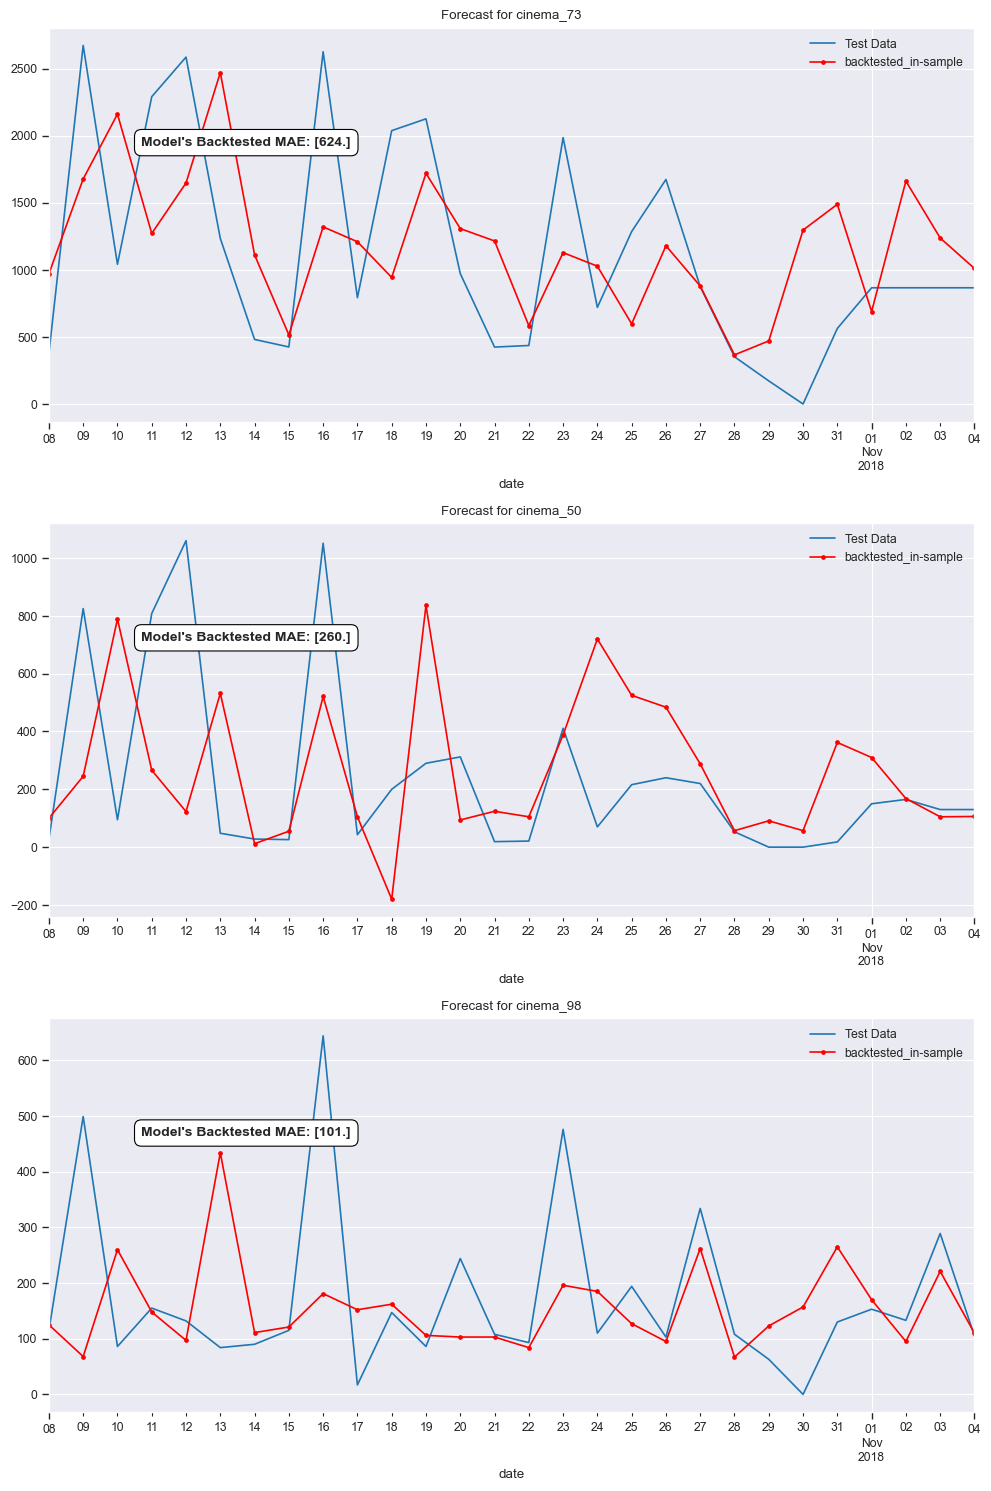

In [73]:
#first things first, lets plot our model predictions on the test set 
#plot random sample of our series 
num_ts = 3

data_subset = data_multi.sample(n=3,axis=1)

fig, axes = plt.subplots(nrows=num_ts,
                       figsize=(10,3 * 5))

#generate plots 
for idx in range(num_ts): 
    
    cinema = data_subset.columns[idx] # slice column 
    ax = axes[idx] # grab axes index 
    
    data_subset.iloc[-28:][cinema].plot(ax=ax,label='Test Data')
    test_predictions_df.loc[:,cinema].tail(28).plot(ax=ax,
                                  label='backtested_in-sample',
                                  marker='.',
                                  color='r')
    #Pull Model's mean absolute error 
    model_mae = test_error_metrics_df[test_error_metrics_df.levels == cinema]['mean_absolute_error'].values.round()
    ax.legend(bbox_to_anchor=(1,1))
    ax.set_title(f'Forecast for {cinema}')
    #add error to plot 
    ax.text(transform=ax.transAxes,
            x=.1,
            y=.7,
            s=f"Model's Backtested MAE: {model_mae}",
            bbox=dict(facecolor='white', 
                      edgecolor='black', boxstyle='round,pad=0.5'),
           fontweight='bold',fontsize=10)
fig.tight_layout()

In [63]:
#lets see how our new forecasts add up to the total demand... 
fig = go.Figure() 

trace1 = go.Scatter(x=data_multi.index,
                    y=data_multi[cinemas_to_fcst].sum(axis=1),
                    name='Total Historical Ticket Sales',
                    mode='lines')

#plot insample 
trace2 = go.Scatter(x=test_predictions_df.index,
                    y=test_predictions_df.sum(axis=1),
                    name='Total Backtested Predictions',
                    mode='lines')


fig.add_trace(trace1)
fig.add_trace(trace2)


fig.update_layout(
    title='Historical Demand Theatre vs Backtested Predictions (Test Set)',
    xaxis_title='Date',
    yaxis_title='Demand',
    width=800,
    height=400,
    margin = dict(l=20,r=20,t=35,b=20),
    legend = dict(
        orientation='h',
        yanchor='top',
        y=1.1,
        xanchor='left',
        x=0.001
    )
)

fig.show()

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [70]:
#it looks like we are still underpredicting. Namely I see its on Oct 9, 16, 23 

residuals = data_multi[cinemas_to_fcst].mean(axis=1) - test_predictions_df.mean(axis=1)

fig = px.box(residuals,color=residuals.index.day_name())

fig.update_layout(title='Residuals by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Demand',
       width=800,
    height=400,
    margin = dict(l=20,r=20,t=35,b=20),
    legend = dict(
        orientation='v',
        y=1.1,
        xanchor='left',
        x=0.001
))

fig.show()

/Users/jack/tensorflow-test/env/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



overall as shown by the plot the model is picking up a bit better on the effect we see on tuesdays... we are now exhibiting a slight positive bias, which in our movie theatre case is better than a negative bias....

# Metrics of Choice

Normalized Deviation- the MAE / mean demand of the timeseries

Normalized RMSE - the RMSE / mean demand of the timeseries

In [92]:

def normalized_deviation(y_true, y_pred):
    """
    Calculate the normalized deviation between true and predicted values.
    
    Parameters:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
    
    Returns:
        float: Normalized deviation.
    """
    mean_true = np.mean(y_true)
    dev = np.sum(np.abs(y_true - y_pred))
    norm_dev = dev / (len(y_true) * mean_true)
    return norm_dev

def normalized_rmse(y_true, y_pred):
    """
    Calculate the normalized root mean squared error (NRMSE) between true and predicted values.
    
    Parameters:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
    
    Returns:
        float: Normalized RMSE.
    """
    rmse = np.sqrt(np.mean(np.square(y_true - y_pred)))
    mean_true = np.mean(y_true)
    nrmse = rmse / mean_true
    return nrmse

In [101]:
nd = normalized_deviation(data_multi.loc[test_predictions_df.index,
                                              cinemas_to_fcst].mean(axis=1),
                     test_predictions_df.mean(axis=1))
nrmse = normalized_rmse(data_multi.loc[test_predictions_df.index,
                                              cinemas_to_fcst].mean(axis=1),
                     test_predictions_df.mean(axis=1))


In [108]:
print(f'The Forecast exhibits a Normalized Deviation (Normalized MAE) of... {nd * 100:.2f}%.')
print(f'The Forecast exhibits a Normalized RMSE of... {nrmse * 100:.2f}%.')
print(f'The Average Mean Absolute Error is: {test_error_metrics_df.mean_absolute_error.mean().round()} tickets.')

The Forecast exhibits a Normalized Deviation (Normalized MAE) of... 47.19%.
The Forecast exhibits a Normalized RMSE of... 61.64%.
The Average Mean Absolute Error is: 245.0 tickets.
